In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank-full.csv.crdownload', sep =';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21633,34,technician,married,tertiary,no,5547.0,yes,no,cellular,19.0,aug,73.0,6.0,-1.0,0.0,unknown,no
21634,40,management,single,tertiary,no,171.0,no,no,cellular,19.0,aug,1241.0,3.0,-1.0,0.0,unknown,no
21635,35,technician,married,secondary,no,141.0,yes,no,cellular,19.0,aug,299.0,2.0,-1.0,0.0,unknown,no
21636,36,technician,married,tertiary,no,60.0,no,no,cellular,19.0,aug,209.0,2.0,-1.0,0.0,unknown,no


In [3]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [4]:
df=df.drop(columns=['age','job','marital','education','default','contact','day','month','poutcome','pdays','previous'],axis=1)
df.head(5)

,balance,housing,loan,duration,campaign,y
0,2143.0,yes,no,261.0,1.0,no
1,29.0,yes,no,151.0,1.0,no
2,2.0,yes,yes,76.0,1.0,no
3,1506.0,yes,no,92.0,1.0,no
4,1.0,no,no,198.0,1.0,no


In [5]:
df.columns

Index(['balance', 'housing', 'loan', 'duration', 'campaign', 'y'], dtype='object')

In [6]:
df=df[['y','balance', 'housing', 'loan', 'duration', 'campaign']]
df.head(1)

,y,balance,housing,loan,duration,campaign
0,no,2143.0,yes,no,261.0,1.0


In [7]:
df.shape

(21638, 6)

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

y           0
balance     0
housing     0
loan        0
duration    0
campaign    0
dtype: int64

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lg = LogisticRegression()

In [17]:
df['y'].replace('no','0',inplace=True)
df['y'].replace('yes','1',inplace=True)

df['housing'].replace('no','0',inplace=True)
df['housing'].replace('yes','1',inplace=True)

df['loan'].replace('no','0',inplace=True)
df['loan'].replace('yes','1',inplace=True)

In [18]:
df

,y,balance,housing,loan,duration,campaign
0,0,2143.0,1,0,261.0,1.0
1,0,29.0,1,0,151.0,1.0
2,0,2.0,1,1,76.0,1.0
3,0,1506.0,1,0,92.0,1.0
4,0,1.0,0,0,198.0,1.0
...,...,...,...,...,...,...
21632,0,0.0,0,0,155.0,4.0
21633,0,5547.0,1,0,73.0,6.0
21634,0,171.0,0,0,1241.0,3.0
21635,0,141.0,1,0,299.0,2.0


In [19]:
df.dtypes

y            object
balance     float64
housing      object
loan         object
duration    float64
campaign    float64
dtype: object

In [20]:
df = df.astype({'loan':'float'})
df = df.astype({'housing':'float'})
df = df.astype({'y':'float'})
df = df.astype({'balance':'float'})
df = df.astype({'duration':'float'})
df = df.astype({'campaign':'float'})

In [21]:
df.dtypes

y           float64
balance     float64
housing     float64
loan        float64
duration    float64
campaign    float64
dtype: object

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
x = df.iloc[:,1:]
y = df['y']

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=1)

In [26]:
xtrain

,balance,housing,loan,duration,campaign
10710,1035.0,0.0,0.0,703.0,1.0
10186,464.0,0.0,1.0,86.0,2.0
8261,-205.0,1.0,0.0,126.0,1.0
4251,396.0,1.0,0.0,104.0,1.0
21011,99.0,0.0,0.0,170.0,2.0
...,...,...,...,...,...
10955,-616.0,1.0,0.0,370.0,2.0
17289,0.0,0.0,0.0,55.0,2.0
5192,4191.0,0.0,0.0,363.0,6.0
12172,1783.0,0.0,0.0,11.0,11.0


In [27]:
#Train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred = lg.predict(xtest)

In [28]:
len(xtest)

5410

In [29]:
len(ypred)

5410

In [30]:
print('Actual Y: ', ytest[:250].values)
print('Predict Y:', ypred[:250])

Actual Y:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predict Y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      5156
         1.0       0.57      0.35      0.44       254

    accuracy                           0.96      5410
   macro avg       0.77      0.67      0.71      5410
weighted avg       0.95      0.96      0.95      5410



In [33]:
confusion_matrix(ytest,ypred)

array([[5089,   67],
       [ 164,   90]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Values')

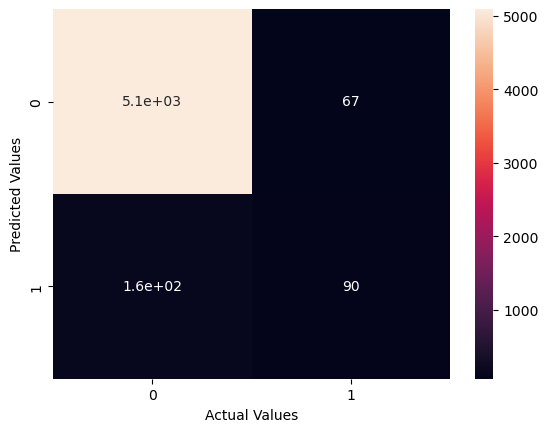

In [34]:
import seaborn as sns
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [35]:
print(ytest[:250].values)
print(ypred[:250])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

In [36]:
#Threshold selection
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.00546179, 0.00900944, 0.02097309, ..., 0.03022665, 0.03866925,
       0.00435527])

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

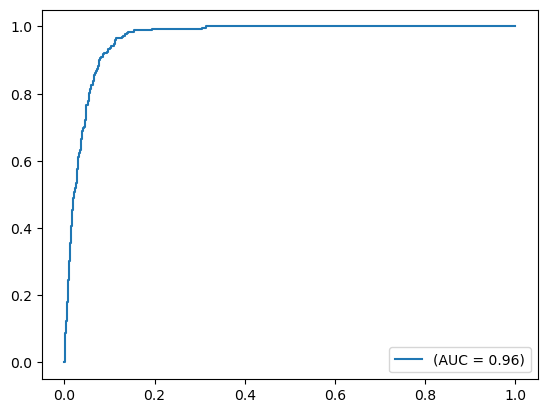

In [38]:
auc = roc_auc_score(ytest,proba)

fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [39]:
auc

0.9644585010659548

In [40]:
threshold

array([1.99999882e+00, 9.99998819e-01, 9.99913011e-01, 9.99639600e-01,
       9.98867017e-01, 9.92831096e-01, 9.91405065e-01, 9.58961708e-01,
       9.56849024e-01, 9.52246551e-01, 9.42853757e-01, 9.38477641e-01,
       9.33318104e-01, 9.28699845e-01, 9.20805261e-01, 9.19835036e-01,
       9.13210186e-01, 9.12685499e-01, 9.11987347e-01, 9.10775776e-01,
       8.93880324e-01, 8.86106482e-01, 8.82003154e-01, 8.74644654e-01,
       8.57784140e-01, 8.48551206e-01, 8.40262648e-01, 8.03127347e-01,
       8.03043755e-01, 8.02574876e-01, 7.96239839e-01, 7.91632412e-01,
       7.90275516e-01, 7.87135529e-01, 7.86728206e-01, 7.83838758e-01,
       7.75824377e-01, 7.60131160e-01, 7.40299771e-01, 7.36144561e-01,
       7.29539461e-01, 7.14259551e-01, 7.10371163e-01, 7.05977478e-01,
       6.96807070e-01, 6.93475356e-01, 6.83249715e-01, 6.81872874e-01,
       6.80107419e-01, 6.71633759e-01, 6.70551219e-01, 6.61562081e-01,
       6.59731384e-01, 6.38838278e-01, 6.36182238e-01, 6.25649067e-01,
      

In [41]:
len(threshold)

347

In [43]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [44]:
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
75,0.509067,0.957486
86,0.416959,0.957301
88,0.408211,0.957301
104,0.338248,0.957301
82,0.440786,0.957301
...,...,...
342,0.005939,0.167468
343,0.005932,0.167283
344,0.005486,0.135675
345,0.005486,0.135490


In [45]:
from sklearn.preprocessing import binarize

In [46]:
y = binarize([proba], threshold=0.558102)[0]
y

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      5156
         1.0       0.57      0.30      0.40       254

    accuracy                           0.96      5410
   macro avg       0.77      0.65      0.69      5410
weighted avg       0.95      0.96      0.95      5410

